# Importing the libraries

In [1]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [13]:
df= pd.read_csv(r'C:\Users\yokau\Downloads\Fraud.csv')

#### Shape

In [4]:
df.shape

(6362620, 11)

#### Handling Null values

In [5]:
# nv = null values
nv_df = df.isnull().sum()
nv_df = nv_df[nv_df>0]
nv_df

Series([], dtype: int64)

#### Checking Duplicates

In [6]:
print(df.duplicated().sum())

0


####  Checking the datatypes

In [7]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

# seeing the statistics summary

In [7]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

# eda 

In [9]:
# counting value isFlaggedFraud

ff = df['isFraud'].value_counts()
ff

0    6354407
1       8213
Name: isFraud, dtype: int64

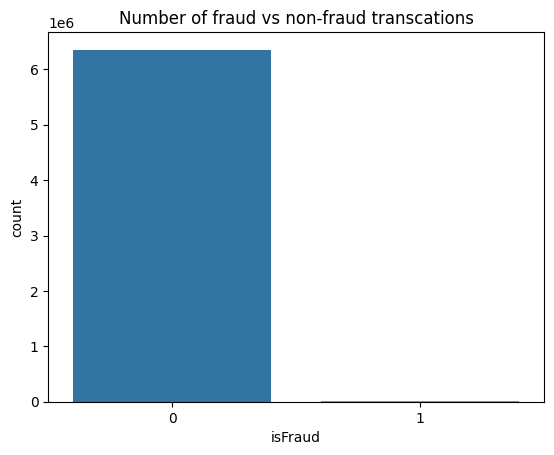

In [10]:
sns.countplot(x='isFraud', data=df)
plt.title('Number of fraud vs non-fraud transcations')
plt.show()

# seeing how much money was there in account

In [1]:
import plotly.express as px

# Filter the dataframe so that it does not crash the browser
Fraud_filtered = df.head(1000)

# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.bar(Fraud_filtered, y='oldbalanceDest')
fig.update_layout(
    title='seeing the old balance Dest', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

NameError: name 'df' is not defined

# seeing by which means the money is taken out from the account most

In [12]:
import plotly.express as px

# Filter the dataframe so that it does not crash the browser
Fraud_filtered = df.head(1000)

# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.bar(Fraud_filtered, x='type', y='amount')
fig.update_layout(
    title='seeing how mostly money is taken out', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

# seeing at which time  money is taken out 

In [13]:
import plotly.express as px

# Filter the dataframe so that it does not crash the browser
Fraud_filtered = df.head(1000)

# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.bar(Fraud_filtered, x='type', y='amount', color='step')
fig.update_layout(
    title='seeing how much amount of money is taken out at what time of day', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

# comparing old balance with new after fruad transaction

In [14]:
import plotly.express as px

# Filter the dataframe so that it does not crash the browser
Fraud_filtered = df.head(1000)

# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.histogram(Fraud_filtered, x='oldbalanceOrg', y='newbalanceOrig', histfunc='count')
fig.update_layout(
    title='comparing the old balance and the newbalance', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

In [15]:
import plotly.express as px

# Filter the dataframe so that it does not crash the browser
Fraud_filtered = df.head(1000)

# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.histogram(Fraud_filtered, x='oldbalanceOrg', y='newbalanceOrig', color='type', histfunc='count')
fig.update_layout(
    title='seeing how much was the old balance and new balance after how money was taken out', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

In [16]:
import plotly.express as px

# Filter the dataframe so that it does not crash the browser
Fraud_filtered = df.head(1000)

# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.scatter(Fraud_filtered, x='step', y='amount', color='isFraud')
fig.update_layout(
    title='seeing which time of day which were the fraud transaction is done', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

In [17]:
import plotly.express as px

# Filter the dataframe so that it does not crash the browser
Fraud_filtered = df.head(1000)

# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.bar(Fraud_filtered, x='type', y='isFraud', color='isFraud')
fig.update_layout(
    title='seeing by  which means fraud transaction is done', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

In [18]:
import plotly.express as px

# Filter the dataframe so that it does not crash the browser
Fraud_filtered = df.head(1000)

# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.bar(Fraud_filtered, x='isFraud', y='amount', color='isFraud')
fig.update_layout(
    title='seeing how much amount  is fraudulent', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

In [19]:
import plotly.express as px

# Filter the dataframe so that it does not crash the browser
Fraud_filtered = df.head(1000)

# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.histogram(Fraud_filtered, x='isFlaggedFraud', y='isFraud', color='isFraud', histfunc='count')
fig.update_layout(
    title='counting  the common in isFlaggedFraud and  isFraud transaction ', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

# correlation

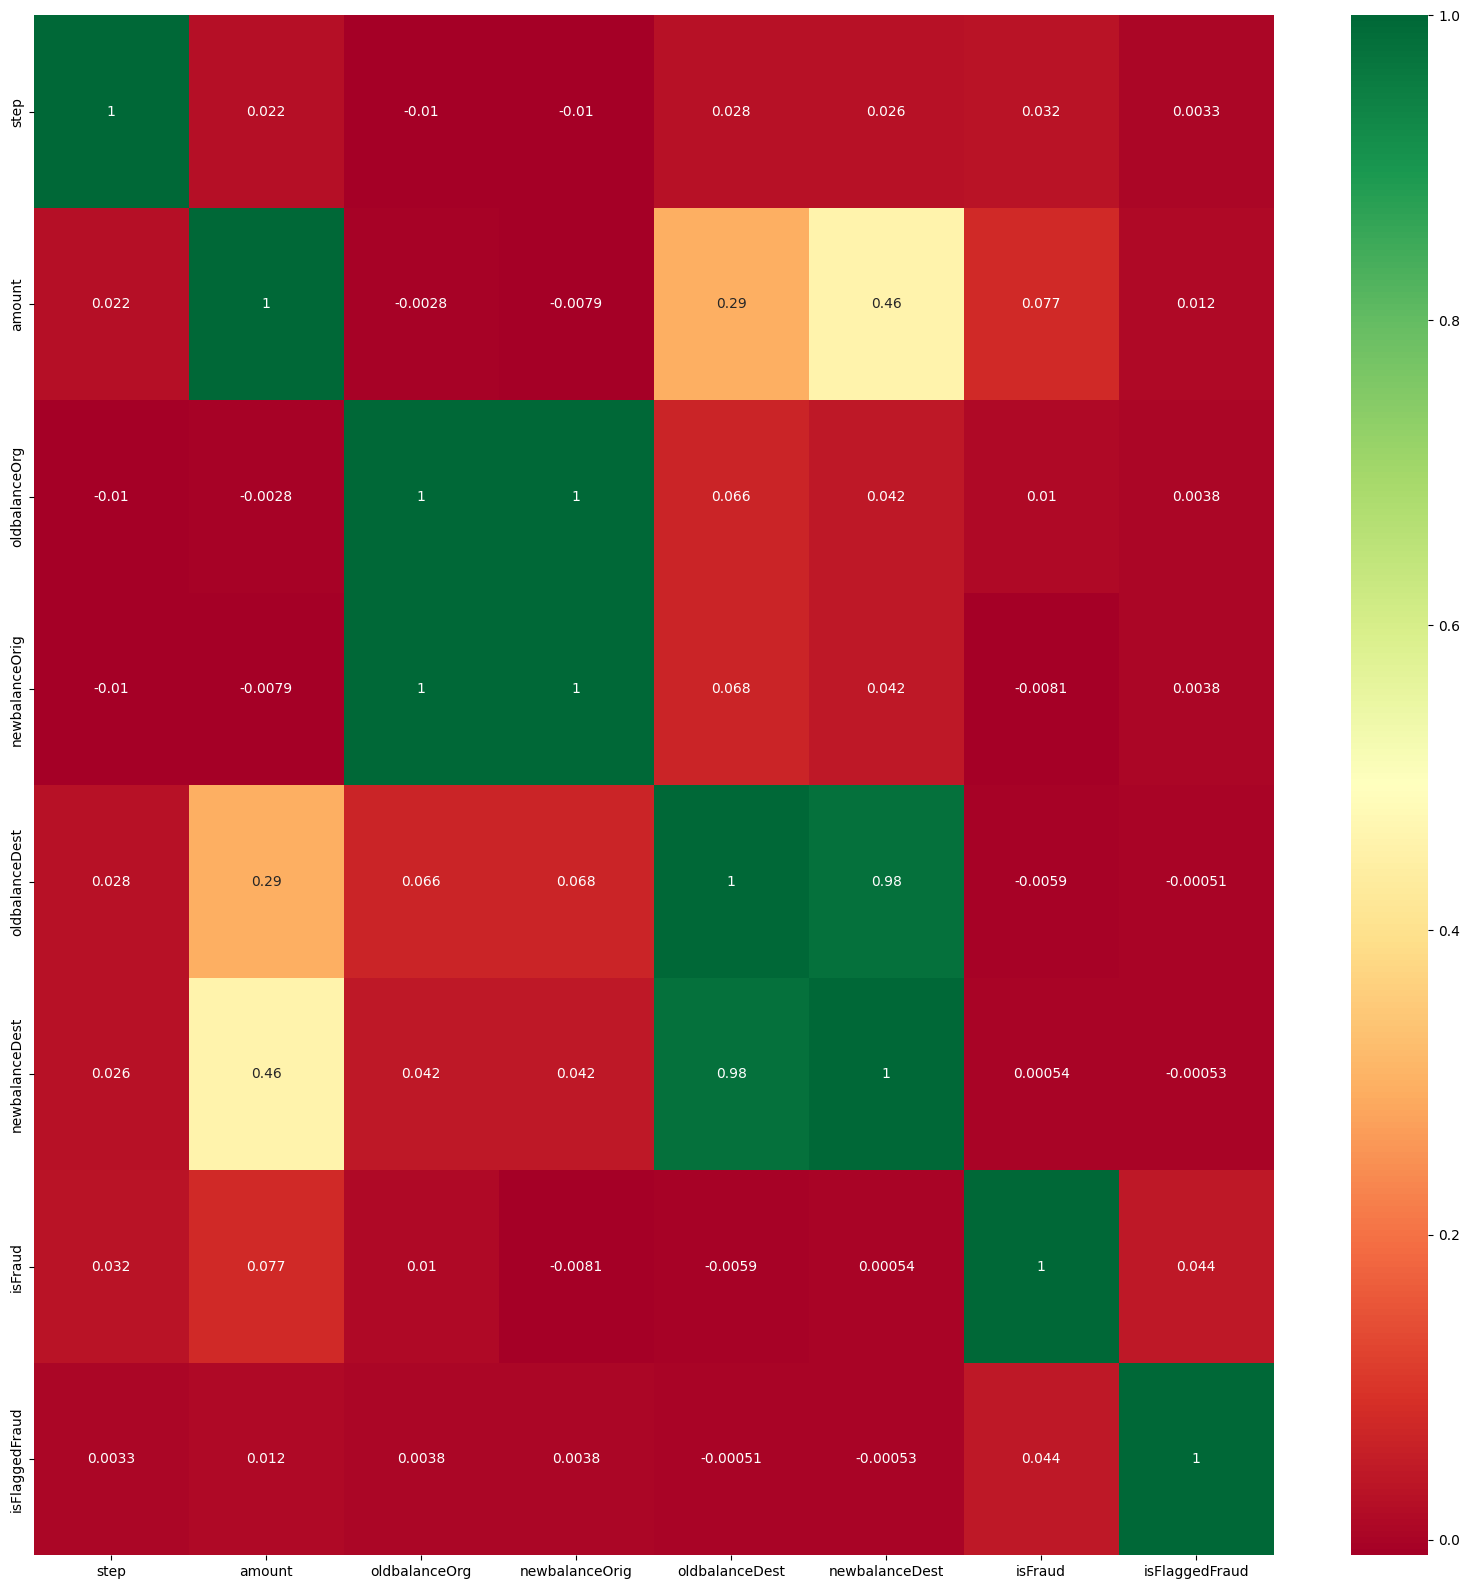

In [9]:
corrmat=df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [ ]:
sns.pairplot(df)

# dropping columns not needed for data preprocessing


In [14]:
df.drop(['nameOrig', 'nameDest','step' ], axis=1 ,inplace=True)

# applying pd dummies for df

In [15]:
df=pd.get_dummies(df,drop_first=True)

In [23]:
df

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,0,1,0
1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,0,1,0
2,181.00,181.00,0.00,0.00,0.00,1,0,0,0,0,1
3,181.00,181.00,0.00,21182.00,0.00,1,0,1,0,0,0
4,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0.00,339682.13,1,0,1,0,0,0
6362616,6311409.28,6311409.28,0.00,0.00,0.00,1,0,0,0,0,1
6362617,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,1,0,0,0
6362618,850002.52,850002.52,0.00,0.00,0.00,1,0,0,0,0,1


# creating a df to test get prediction

In [71]:
test_df= pd.read_csv(r'C:\Users\yokau\Downloads\Fraud.csv')
# Deleted columns isFraud
test_df.drop(['isFraud'], axis=1, inplace=True)

# dropping columns not needed for test_df


In [72]:
test_df.drop(['nameOrig', 'nameDest','step' ], axis=1 ,inplace=True)

# applying pd dummies for test_df

In [73]:
test_df=pd.get_dummies(test_df,drop_first=True)

In [74]:
test_df

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,1,0
1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,1,0
2,181.00,181.00,0.00,0.00,0.00,0,0,0,0,1
3,181.00,181.00,0.00,21182.00,0.00,0,1,0,0,0
4,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0.00,339682.13,0,1,0,0,0
6362616,6311409.28,6311409.28,0.00,0.00,0.00,0,0,0,0,1
6362617,6311409.28,6311409.28,0.00,68488.84,6379898.11,0,1,0,0,0
6362618,850002.52,850002.52,0.00,0.00,0.00,0,0,0,0,1


#### Selecting Features using Correlation

In [16]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()   # correlation matrix
    for i in range(len(corr_matrix.columns)):  # i is the index
        for j in range(i):
            if(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return list(col_corr)

corr_features = correlation(df, 0.85)
print("Features with high correlation ", corr_features)

Features with high correlation  ['newbalanceOrig', 'newbalanceDest']


In [25]:
print(len(corr_features))

2


In [17]:
df.drop(columns=corr_features, axis=1, inplace=True)
print(df.shape)

(6362620, 9)


In [81]:

test_df.drop(columns=corr_features, axis=1, inplace=True)

print(test_df.shape)

(6362620, 8)


#### Select the Dependent and Independent Features

In [76]:
x = df.drop('isFraud',axis=1)  # dataframe
y = df['isFraud']              # series
print(type(x))
print(type(y))
print(x.shape,y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(6362620, 8) (6362620,)


In [28]:
x

,amount,oldbalanceOrg,oldbalanceDest,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.00,0.00,0,0,0,1,0
1,1864.28,21249.00,0.00,0,0,0,1,0
2,181.00,181.00,0.00,0,0,0,0,1
3,181.00,181.00,21182.00,0,1,0,0,0
4,11668.14,41554.00,0.00,0,0,0,1,0
...,...,...,...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0,1,0,0,0
6362616,6311409.28,6311409.28,0.00,0,0,0,0,1
6362617,6311409.28,6311409.28,68488.84,0,1,0,0,0
6362618,850002.52,850002.52,0.00,0,0,0,0,1


In [29]:
y

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64

#### Dividing the data into training and testing data

In [30]:
from sklearn.model_selection import train_test_split

In [77]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4771965, 8)
(1590655, 8)
(4771965,)
(1590655,)


#### Creating Functions to generate confusion matrix, classification report, accuracy score, ROC_AUC Score and to compute Training and the Testing Score

In [32]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve, auc

In [33]:
d = {'Model':[],'TP':[],'FN':[],'FP':[],'TN':[],'Acc':[],'AUC':[]}

def eval_model(model,model_name,x_test,ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    acc = accuracy_score(ytest,ypred)
    cls_rep = classification_report(ytest,ypred,zero_division=0)
    auc_score = roc_auc_score(y_test,model.predict_proba(x_test)[:,1])
    print('Confusion Matrix\n',cm)
    print('Accuracy Score',acc)
    print('AUC Score',auc_score)
    print('Classification Report\n',cls_rep)
    d['Model'].append(model_name)
    d['TP'].append(cm[0,0])
    d['FN'].append(cm[0,1])
    d['FP'].append(cm[1,0])
    d['TN'].append(cm[1,1])
    d['Acc'].append(acc)
    d['AUC'].append(auc_score)
    
    
def plot_roc_auc(model,ytest):
    fpr,tpr,thresh = roc_curve(y_test,model.predict_proba(x_test)[:,1])
    auc_score = roc_auc_score(y_test,model.predict_proba(x_test)[:,1])
    print('Area Under Curve',auc_score)
    plt.plot(fpr,tpr,color='orange')
    plt.plot([0,1],[0,1],label='TPR=FPR')
    plt.title('ROC_AUC Curve')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.grid()
    plt.legend()
    plt.show()
    
def mscore(model):
    print('Training Score',model.score(x_train,y_train))  # Training dataset Accuracy
    print('Testing Score',model.score(x_test,y_test))     # Testing dataset accuracy

#### 1) Applying Logistic Regression

In [34]:
# importing LogReg library
from sklearn.linear_model import LogisticRegression

In [35]:
# Building the LogReg model
log_reg = LogisticRegression(max_iter=100000,solver='liblinear')
log_reg.fit(x_train,y_train)

LogisticRegression(max_iter=100000, solver='liblinear')

In [36]:
# Computing Training and testing score
mscore(log_reg)

Training Score 0.9987074507042696
Testing Score 0.9987143660944705


In [37]:
# Generating prediction
ypred_logreg = log_reg.predict(x_test)
print(ypred_logreg)

[0 0 0 ... 0 0 0]


In [38]:
# Evaluate the model - confusion matrix, clasification Report, AUC Score, Accuaracy
eval_model(log_reg,'Log_Reg',x_test,y_test,ypred_logreg)

Confusion Matrix
 [[1588610       0]
 [   2045       0]]
Accuracy Score 0.9987143660944705
AUC Score 0.42949579870603616
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588610
           1       0.00      0.00      0.00      2045

    accuracy                           1.00   1590655
   macro avg       0.50      0.50      0.50   1590655
weighted avg       1.00      1.00      1.00   1590655



Area Under Curve 0.42949579870603616


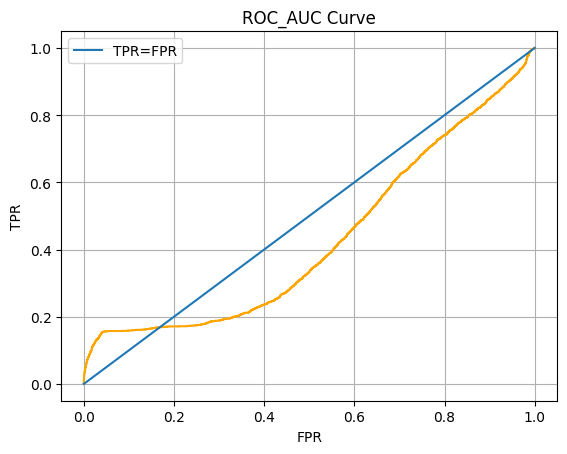

In [39]:
# Plotting ROC AUC Curve
plot_roc_auc(log_reg,y_test)

#### Applying Decision Tree Classifier

In [40]:
# importing DT library
from sklearn.tree import DecisionTreeClassifier

In [41]:
# Building the Decition Tree model
dt = DecisionTreeClassifier(criterion='gini',min_samples_split=50,max_depth=10)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=50)

In [42]:
# Training and the Testing Score
mscore(dt)

Training Score 0.9992598436912258
Testing Score 0.9992449651244298


In [43]:
# Generating the predictions
ypred_dt = dt.predict(x_test)

In [44]:
# Evaluate the model - confusion matrix, classification Report, AUC Score, Accuaracy
eval_model(dt,'DT',x_test,y_test,ypred_dt)

Confusion Matrix
 [[1588404     206]
 [    995    1050]]
Accuracy Score 0.9992449651244298
AUC Score 0.9926724810201054
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588610
           1       0.84      0.51      0.64      2045

    accuracy                           1.00   1590655
   macro avg       0.92      0.76      0.82   1590655
weighted avg       1.00      1.00      1.00   1590655



Area Under Curve 0.9926724810201054


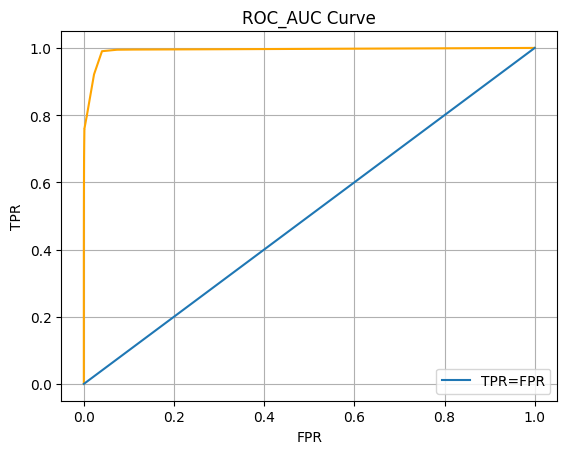

In [45]:
# Plotting ROC_AUC Curve
plot_roc_auc(dt,y_test)

#### Applying RandomForest Classifier

In [46]:
# Import random Forest library
from sklearn.ensemble import RandomForestClassifier

In [47]:
# Building the RF Model
rf = RandomForestClassifier(n_estimators=80,criterion='gini',min_samples_split=50,max_depth=10)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=50, n_estimators=80)

In [48]:
# Training and the testing Score
mscore(rf)

Training Score 0.9991997007522059
Testing Score 0.9991965573930236


In [49]:
# Generating the predictions
ypred_rf = rf.predict(x_test)

In [50]:
# Evaluate the model - confusion matrix, classification Report, AUC Score, Accuaracy
eval_model(rf,'Random Forest',x_test,y_test,ypred_rf)

Confusion Matrix
 [[1588598      12]
 [   1266     779]]
Accuracy Score 0.9991965573930236
AUC Score 0.9914682861025237
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588610
           1       0.98      0.38      0.55      2045

    accuracy                           1.00   1590655
   macro avg       0.99      0.69      0.77   1590655
weighted avg       1.00      1.00      1.00   1590655



Area Under Curve 0.9914682861025237


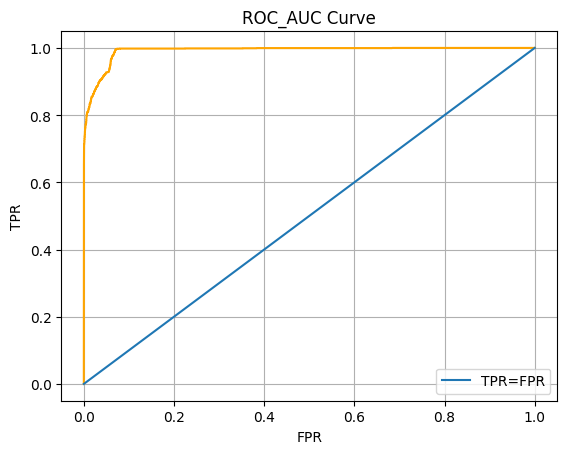

In [51]:
# Plotting ROC_AUC Curve
plot_roc_auc(rf,y_test)

#### Applying Ensemble Learning

In [52]:
# Importing the  AdaBoost Classifier library
from sklearn.ensemble import AdaBoostClassifier

In [53]:
# Builing the Adaboost model
adab = AdaBoostClassifier(n_estimators=70)
adab.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=70)

In [54]:
# Computing the Training and Testing Score
mscore(adab)

Training Score 0.9988413578054324
Testing Score 0.9988470158519603


In [55]:
# Generating the predictions
ypred_adab = adab.predict(x_test)

In [56]:
# Evaluate the model - confusion matrix, classification Report, AUC Score, Accuaracy
eval_model(adab,'AdaBoost',x_test,y_test,ypred_adab)

Confusion Matrix
 [[1588518      92]
 [   1742     303]]
Accuracy Score 0.9988470158519603
AUC Score 0.9804183400693712
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588610
           1       0.77      0.15      0.25      2045

    accuracy                           1.00   1590655
   macro avg       0.88      0.57      0.62   1590655
weighted avg       1.00      1.00      1.00   1590655



Area Under Curve 0.9804183400693712


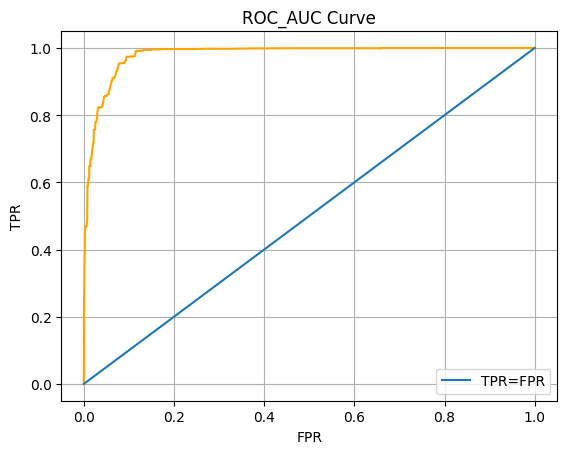

In [57]:
# Plotting the ROC_AUC Curve
plot_roc_auc(adab,y_test)

#### Comparing different Classification Models

In [58]:
print(d)

{'Model': ['Log_Reg', 'DT', 'Random Forest', 'AdaBoost'], 'TP': [1588610, 1588404, 1588598, 1588518], 'FN': [0, 206, 12, 92], 'FP': [2045, 995, 1266, 1742], 'TN': [0, 1050, 779, 303], 'Acc': [0.9987143660944705, 0.9992449651244298, 0.9991965573930236, 0.9988470158519603], 'AUC': [0.42949579870603616, 0.9926724810201054, 0.9914682861025237, 0.9804183400693712]}


In [59]:
model_performance = pd.DataFrame(d)
model_performance

,Model,TP,FN,FP,TN,Acc,AUC
0,Log_Reg,1588610,0,2045,0,0.998714,0.429496
1,DT,1588404,206,995,1050,0.999245,0.992672
2,Random Forest,1588598,12,1266,779,0.999197,0.991468
3,AdaBoost,1588518,92,1742,303,0.998847,0.980418


#### Generating Predictions on Test data using Random Forest

In [60]:
print(x_train.shape)
print(x_test.shape)
print(x.shape)
print(y.shape)

(4771965, 8)
(1590655, 8)
(6362620, 8)
(6362620,)


#### Final model (Random Forest Classifier) based on Evaluation from model_performance dataframe

In [61]:
model = RandomForestClassifier(n_estimators=70)
model.fit(x,y)  # x and y is from train_df

RandomForestClassifier(n_estimators=70)

In [78]:
test_df.shape

(6362620, 10)

#### Generating Predictions on the test_df

In [82]:
ypred = model.predict(test_df)

In [88]:
ypred

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

# BINNARY CLASSIFICATION with pycaret


In [18]:
from pycaret.datasets import get_data

# spilting data for train

In [19]:
data_train = df.sample(frac= 0.9, random_state=786)

In [ ]:
data_train

In [20]:

data_train.shape

(5726358, 9)

# spilting data for test

In [21]:
data_test = df.drop(data_train. index)

In [22]:
data_test.shape

(636262, 9)

 # arranging dataset accordingly for data_train

In [23]:
data_train.reset_index(inplace=True,drop=True)

# arranging dataset accordingly for data_test

In [24]:
data_test.reset_index(inplace=True,drop=True)

# implemenation of classification

In [25]:
from pycaret.classification import *

In [26]:

cc = setup(data= data_train,
target = "isFraud",
session_id=123 )


,Description,Value
0,session_id,123
1,Target,isFraud
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(5726358, 9)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


# saving the best model in a variable

In [27]:
best_model=compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.9988,0.9797,0.1342,0.8325,0.2288,0.2286,0.3306,27.7670
knn,K Neighbors Classifier,0.9994,0.9109,0.6879,0.7985,0.7389,0.7386,0.7408,439.3250
lda,Linear Discriminant Analysis,0.9940,0.8917,0.1646,0.0414,0.0662,0.0642,0.0802,1.8190
dt,Decision Tree Classifier,0.9994,0.8832,0.7667,0.7552,0.7608,0.7605,0.7606,3.1210
nb,Naive Bayes,0.9900,0.7225,0.1652,0.0235,0.0412,0.0390,0.0592,0.6100
gbc,Gradient Boosting Classifier,0.9904,0.6631,0.0910,0.3589,0.0533,0.0525,0.0874,111.8080
lr,Logistic Regression,0.9987,0.6489,0.0046,0.4375,0.0091,0.0091,0.0441,8.6550
dummy,Dummy Classifier,0.9987,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4800
lightgbm,Light Gradient Boosting Machine,0.9973,0.4659,0.1492,0.2223,0.1625,0.1615,0.1721,4.9660
svm,SVM - Linear Kernel,0.9987,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,11.3120


In [29]:
print(best_model)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=123)


# creating a 	Ada Boost Classifier model

In [30]:
ada=create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9988,0.9790,0.1062,0.8333,0.1884,0.1881,0.2972
1,0.9989,0.9794,0.1873,0.8509,0.3070,0.3066,0.3989
2,0.9988,0.9804,0.1178,0.7922,0.2050,0.2048,0.3052
3,0.9989,0.9784,0.1618,0.8077,0.2697,0.2693,0.3613
4,0.9988,0.9799,0.1040,0.8710,0.1859,0.1857,0.3008
5,0.9989,0.9791,0.1657,0.8866,0.2792,0.2789,0.3830
6,0.9988,0.9799,0.0906,0.7966,0.1626,0.1624,0.2683
7,0.9989,0.9807,0.1252,0.9420,0.2211,0.2209,0.3433
8,0.9989,0.9801,0.1908,0.7444,0.3037,0.3033,0.3765


# tuning the ada model further for better results

In [31]:
tuned_ada=tune_model(ada)
print(tuned_ada)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9988,0.9792,0.0386,0.9524,0.0742,0.0741,0.1916
1,0.9988,0.9794,0.0483,1.0000,0.0921,0.0920,0.2196
2,0.9988,0.9803,0.0579,1.0000,0.1095,0.1094,0.2405
3,0.9988,0.9792,0.0462,0.9600,0.0882,0.0881,0.2106
4,0.9987,0.9803,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9988,0.9799,0.0520,0.9310,0.0985,0.0984,0.2199
6,0.9987,0.9797,0.0000,0.0000,0.0000,-0.0000,-0.0001
7,0.9987,0.9814,0.0000,0.0000,0.0000,-0.0000,-0.0001
8,0.9988,0.9804,0.0674,1.0000,0.1264,0.1262,0.2595


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.2,
                   n_estimators=230, random_state=123)


# plotting the r2 score

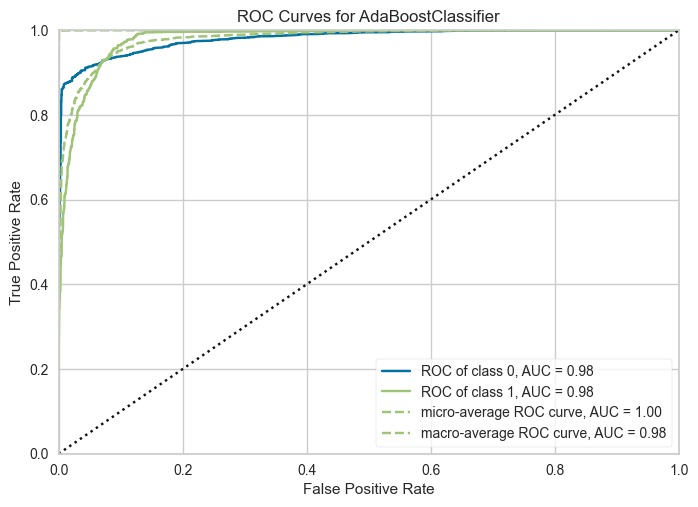

In [32]:
plot_model(tuned_ada)

# plotting the error for Ada Boost Classifier 

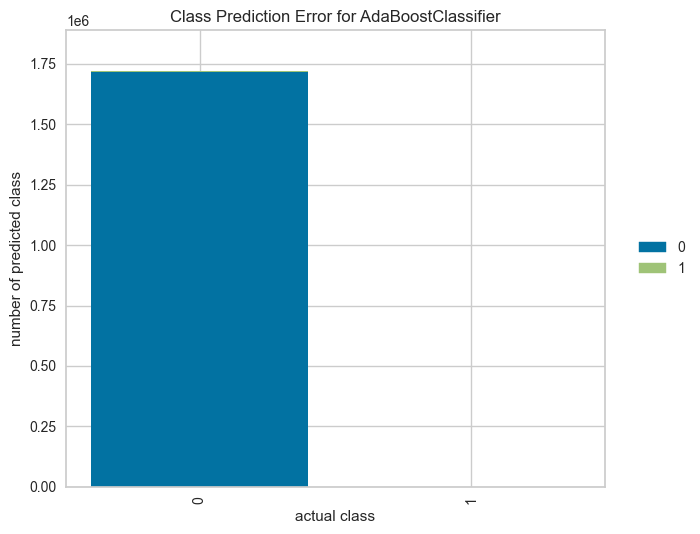

In [33]:

plot_model(tuned_ada, plot="error")


 # plotting all the important features for binary classification

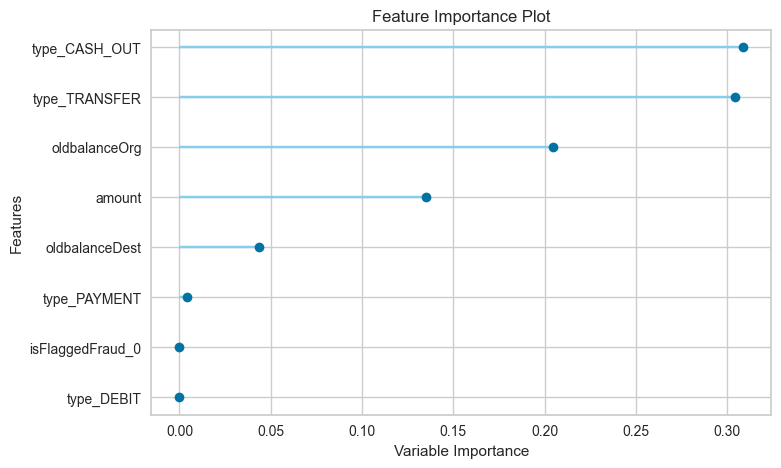

In [34]:
plot_model(tuned_ada, plot="feature")


# making prediction validation data

In [35]:
predict_model(tuned_ada)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.9988,0.9804,0.0454,0.9712,0.0867,0.0866,0.2098


,amount,oldbalanceOrg,oldbalanceDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,isFlaggedFraud_0,isFraud,Label,Score
0,1846.040039,3.143670e+05,3.197192e+05,1,0,0,0,1.0,0,0,0.5207
1,167575.218750,0.000000e+00,1.157624e+06,1,0,0,0,1.0,0,0,0.5639
2,2078.379883,3.106017e+06,1.908596e+05,0,0,0,0,1.0,0,0,0.5478
3,8917.540039,2.780013e+04,0.000000e+00,0,0,1,0,1.0,0,0,0.5981
4,15412.589844,5.292000e+03,0.000000e+00,0,0,1,0,1.0,0,0,0.6025
...,...,...,...,...,...,...,...,...,...,...,...
1717903,48692.929688,1.540000e+02,1.448500e+04,1,0,0,0,1.0,0,0,0.5482
1717904,295099.562500,1.107000e+04,4.858503e+04,1,0,0,0,1.0,0,0,0.5480
1717905,487133.218750,2.121600e+04,1.334439e+05,1,0,0,0,1.0,0,0,0.5463
1717906,11023.559570,2.115400e+04,0.000000e+00,0,0,1,0,1.0,0,0,0.6009


# saving the predicted value in a variable of [predict_model(tuned_lda)]

In [36]:

test_pred = predict_model(tuned_ada, data=data_test)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.9988,0.9795,0.0512,1.0000,0.0975,0.0974,0.2262


In [37]:
test_pred

,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,Label,Score
0,4024.36,2671.00,0.00,0,0,0,0,1,0,0,0.6019
1,2560.74,5070.00,0.00,0,0,0,0,1,0,0,0.6012
2,11633.76,10127.00,0.00,0,0,0,0,1,0,0,0.6025
3,4098.78,503264.00,0.00,0,0,0,0,1,0,0,0.5815
4,229133.94,15325.00,5083.00,0,0,1,0,0,0,0,0.5445
...,...,...,...,...,...,...,...,...,...,...,...
636257,8116.53,8116.53,7638.26,1,0,1,0,0,0,0,0.5363
636258,194521.28,194521.28,7203373.74,1,0,1,0,0,0,0,0.5336
636259,1755647.81,1755647.81,2930014.23,1,0,1,0,0,0,0,0.5188
636260,54652.46,54652.46,0.00,1,0,1,0,0,0,0,0.5278


# saving the model

In [38]:

save_model(tuned_ada, "classification Model")


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='isFraud',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                 ('dummy', Dummify(target='isFraud')),
                 ('fix_perfect', Remove_100(target='isFraud')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 (

 # saving the model in variable

In [39]:

saved_final_model = load_model("classification Model")


Transformation Pipeline and Model Successfully Loaded


# making new prediction on saved_final_model



In [40]:
new_prediction = predict_model(saved_final_model, data=data_test)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.9988,0.9795,0.0512,1.0000,0.0975,0.0974,0.2262


In [41]:
new_prediction.head()

,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,Label,Score
0,4024.36,2671.0,0.0,0,0,0,0,1,0,0,0.6019
1,2560.74,5070.0,0.0,0,0,0,0,1,0,0,0.6012
2,11633.76,10127.0,0.0,0,0,0,0,1,0,0,0.6025
3,4098.78,503264.0,0.0,0,0,0,0,1,0,0,0.5815
4,229133.94,15325.0,5083.0,0,0,1,0,0,0,0,0.5445
